# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

In [49]:
#%pip install pandas_datareader

In [50]:
import os
os.environ["LD_LIB_CONFIG_PATH"] = "../../Configuration"

In [56]:
import lseg.data as ld
import pandas as pd
import numpy as np
import cufflinks as cf  # Cufflinks
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

from numpy.random import random, uniform, dirichlet, choice
from numpy.linalg import inv
from scipy.optimize import minimize
from matplotlib.ticker import FuncFormatter
import math
from datetime import datetime, timedelta
import pandas_datareader.data as web

In [5]:
ld.open_session()

<lseg.data.session.Definition object at 0x104aec7d0 {name='workspace'}>

In [17]:
portfolio = ["GOLD.N", 
             "TSLA.O", 
             "005930.KS", 
             'BASFn.DE',
             'IFXGn.DE',
             'SIEGn.DE',
             'EONGn.DE',
             'DBKGn.DE',
             'SATG_p.DE',
             'SAPG.DE',
             'BAYGn.DE',
             'RWEG.DE',
             'HNKG_p.DE']

In [18]:
import datetime as dt
today = dt.datetime.today()
delta_day = today - dt.timedelta(days=720)
print(delta_day, today)

2023-03-16 15:49:11.402119 2025-03-05 15:49:11.402119


In [23]:
df_ts_rndm = ld.get_history([portfolio[0]], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1W")

Precios = df_ts_rndm.rename(columns={'Price Close': portfolio[0]})
Precios

GOLD.N,GOLD.N
Date,
2023-03-17,18.12
2023-03-24,18.52
2023-03-31,18.57
2023-04-06,19.73
2023-04-14,19.67
...,...
2025-01-31,16.37
2025-02-07,17.04
2025-02-14,17.94


In [24]:
for i in portfolio[1:]:
    print(i)
    w = ld.get_history([i], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1W")
    w1 = w.rename(columns={'Price Close': i})
    Precios = Precios.join(w1, lsuffix="_left", rsuffix="_right")

TSLA.O
005930.KS
BASFn.DE
IFXGn.DE
SIEGn.DE
EONGn.DE
DBKGn.DE
SATG_p.DE
SAPG.DE
BAYGn.DE
RWEG.DE
HNKG_p.DE


In [25]:
Precios

,GOLD.N,TSLA.O,005930.KS,BASFn.DE,IFXGn.DE,SIEGn.DE,EONGn.DE,DBKGn.DE,SATG_p.DE,SAPG.DE,BAYGn.DE,RWEG.DE,HNKG_p.DE
Date,,,,,,,,,,,,,
2023-03-17,18.12,180.13,61300,44.915,34.47,137.36,10.575,9.334,390.6,111.58,55.81,37.85,65.48
2023-03-24,18.52,190.41,63000,45.915,34.155,140.58,11.035,8.54,389.5,113.98,55.55,37.46,69.24
2023-03-31,18.57,207.46,64000,48.36,37.68,149.26,11.5,9.356,387.0,116.06,58.72,39.64,72.06
2023-04-06,19.73,185.06,<NA>,48.41,35.295,141.12,11.715,9.456,393.6,117.0,60.56,40.52,74.44
2023-04-14,19.67,185.0,65100,49.705,36.1,146.16,11.76,9.954,394.3,115.96,61.36,40.34,74.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-31,16.37,404.6,52400,46.61,32.055,207.45,11.42,18.94,280.0,268.5,21.64,29.88,84.22
2025-02-07,17.04,361.62,53700,47.52,36.905,207.45,11.63,18.592,252.2,271.0,20.945,28.65,84.68
2025-02-14,17.94,355.84,56000,50.92,37.55,225.2,11.525,19.246,246.8,276.95,21.375,28.55,85.34


In [38]:
Precios = ld.get_history([portfolio[0]], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1W")


Precios['Close'] = Precios['Price Close'].astype(float)
Precios[portfolio[0]] = np.log(Precios['Close'].div(Precios['Close'].shift(1)))
weekly_returns = Precios.drop(['Price Close', 'Close'], axis=1)
weekly_returns 


GOLD.N,GOLD.N
Date,
2023-03-17,NaN
2023-03-24,0.021835
2023-03-31,0.002696
2023-04-06,0.060593
2023-04-14,-0.003046
...,...
2025-01-31,0.014769
2025-02-07,0.040113
2025-02-14,0.051469


In [39]:
for instrument in range(1,len(portfolio)):
    print(instrument, portfolio[intrument])
    Precios = ld.get_history([portfolio[instrument]], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1W")
    Precios['Close'] = Precios['Price Close'].astype(float)
    Precios[portfolio[instrument]] = np.log(Precios['Close'].div(Precios['Close'].shift(1)))
    Precios = Precios.drop(['Price Close', 'Close'], axis=1)
    weekly_returns = weekly_returns.join(Precios)

1 TSLA.O
2 TSLA.O
3 TSLA.O
4 TSLA.O
5 TSLA.O
6 TSLA.O
7 TSLA.O
8 TSLA.O
9 TSLA.O
10 TSLA.O
11 TSLA.O
12 TSLA.O


In [37]:
weekly_returns

,GOLD.N,TSLA.O,005930.KS,BASFn.DE,IFXGn.DE,SIEGn.DE,EONGn.DE,DBKGn.DE,SATG_p.DE,SAPG.DE,BAYGn.DE,RWEG.DE,HNKG_p.DE
Date,,,,,,,,,,,,,
2023-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-24,0.021835,0.055501,0.027355,0.022020,-0.009180,0.023172,0.042579,-0.088903,-0.002820,0.021281,-0.004670,-0.010357,0.055834
2023-03-31,0.002696,0.085759,0.015748,0.051881,0.098220,0.059913,0.041275,0.091257,-0.006439,0.018084,0.055497,0.056565,0.039920
2023-04-06,0.060593,-0.114258,NaN,0.001033,-0.065388,-0.056079,0.018523,0.010632,0.016910,0.008067,0.030854,0.021957,0.032494
2023-04-14,-0.003046,-0.000324,0.001537,0.026399,0.022552,0.035091,0.003834,0.051325,0.001777,-0.008929,0.013124,-0.004452,0.000269
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-31,0.014769,-0.004882,-0.024506,-0.008332,-0.059495,-0.004809,0.051662,-0.005791,0.117337,0.018608,0.035034,0.039944,0.005238
2025-02-07,0.040113,-0.112305,0.024506,0.019336,0.140894,0.000000,0.018222,-0.018545,-0.104567,0.009268,-0.032643,-0.042036,0.005447
2025-02-14,0.051469,-0.016113,0.041939,0.069105,0.017326,0.082099,-0.009069,0.034572,-0.021644,0.021718,0.020322,-0.003497,0.007764


In [40]:
# Se identifican activos que no tengan la historia de rendimientos completa
s = weekly_returns.isnull().apply(sum, axis=0) # count the number of nan in each column
for col in weekly_returns: 
   if s[col] >= 2:  
       del weekly_returns[col]

In [41]:
weekly_returns = weekly_returns.dropna()
weekly_returns

,GOLD.N,TSLA.O,BASFn.DE,IFXGn.DE,SIEGn.DE,EONGn.DE,DBKGn.DE,SATG_p.DE,SAPG.DE,BAYGn.DE,RWEG.DE,HNKG_p.DE
Date,,,,,,,,,,,,
2023-03-24,0.021835,0.055501,0.022020,-0.009180,0.023172,0.042579,-0.088903,-0.002820,0.021281,-0.004670,-0.010357,0.055834
2023-03-31,0.002696,0.085759,0.051881,0.098220,0.059913,0.041275,0.091257,-0.006439,0.018084,0.055497,0.056565,0.039920
2023-04-06,0.060593,-0.114258,0.001033,-0.065388,-0.056079,0.018523,0.010632,0.016910,0.008067,0.030854,0.021957,0.032494
2023-04-14,-0.003046,-0.000324,0.026399,0.022552,0.035091,0.003834,0.051325,0.001777,-0.008929,0.013124,-0.004452,0.000269
2023-04-21,-0.030978,-0.113926,-0.002014,-0.041284,-0.003564,0.023946,-0.005945,-0.118037,0.047985,-0.010979,0.017447,0.009623
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-31,0.014769,-0.004882,-0.008332,-0.059495,-0.004809,0.051662,-0.005791,0.117337,0.018608,0.035034,0.039944,0.005238
2025-02-07,0.040113,-0.112305,0.019336,0.140894,0.000000,0.018222,-0.018545,-0.104567,0.009268,-0.032643,-0.042036,0.005447
2025-02-14,0.051469,-0.016113,0.069105,0.017326,0.082099,-0.009069,0.034572,-0.021644,0.021718,0.020322,-0.003497,0.007764


In [42]:
weekly_returns.shape


(102, 12)

# Set Parameters

In [43]:
stocks = weekly_returns.columns


In [44]:
n_obs, n_assets = weekly_returns.shape
n_assets, n_obs

(12, 102)

In [45]:
NUM_PF = 100000 # no of portfolios to simulate


In [52]:
x0 = uniform(0, 1, n_assets)
x0 /= np.sum(np.abs(x0))
x0

array([0.0027537 , 0.12584569, 0.00983445, 0.18125282, 0.0605263 ,
       0.13998118, 0.08476318, 0.10017545, 0.06073726, 0.1594295 ,
       0.04823491, 0.02646557])

# Annualization Factor


In [53]:
periods_per_year = round(weekly_returns.resample('A').size().mean())
periods_per_year

34

# Compute Mean Returns, Covariance and Precision Matrix


In [54]:
mean_returns = weekly_returns.mean()
cov_matrix = weekly_returns.cov()
cov_matrix

,GOLD.N,TSLA.O,BASFn.DE,IFXGn.DE,SIEGn.DE,EONGn.DE,DBKGn.DE,SATG_p.DE,SAPG.DE,BAYGn.DE,RWEG.DE,HNKG_p.DE
GOLD.N,0.002063,0.000245,0.000406,0.000482,0.000133,0.000358,0.000254,0.000403,0.000119,0.000387,0.000261,0.000068
TSLA.O,0.000245,0.006283,0.000385,0.001440,0.000650,-0.000176,0.000290,0.000875,0.000342,0.000523,0.000200,-0.000044
BASFn.DE,0.000406,0.000385,0.001092,0.000633,0.000518,0.000132,0.000570,0.000790,0.000147,0.000461,0.000085,0.000160
IFXGn.DE,0.000482,0.001440,0.000633,0.002891,0.001244,0.000105,0.000735,0.001017,0.000590,0.000268,0.000316,0.000423
SIEGn.DE,0.000133,0.000650,0.000518,0.001244,0.001350,0.000094,0.000594,0.000860,0.000362,0.000335,0.000232,0.000270
EONGn.DE,0.000358,-0.000176,0.000132,0.000105,0.000094,0.000699,0.000197,0.000230,0.000048,0.000222,0.000467,0.000123
DBKGn.DE,0.000254,0.000290,0.000570,0.000735,0.000594,0.000197,0.001440,0.000442,0.000110,0.000377,0.000362,0.000067
SATG_p.DE,0.000403,0.000875,0.000790,0.001017,0.000860,0.000230,0.000442,0.004125,0.000507,0.000678,0.000213,0.000165
SAPG.DE,0.000119,0.000342,0.000147,0.000590,0.000362,0.000048,0.000110,0.000507,0.000921,0.000064,-0.000099,0.000165
BAYGn.DE,0.000387,0.000523,0.000461,0.000268,0.000335,0.000222,0.000377,0.000678,0.000064,0.002259,0.000072,0.000130


In [57]:
precision_matrix = pd.DataFrame(inv(cov_matrix), index=stocks, columns=stocks)
precision_matrix

,GOLD.N,TSLA.O,BASFn.DE,IFXGn.DE,SIEGn.DE,EONGn.DE,DBKGn.DE,SATG_p.DE,SAPG.DE,BAYGn.DE,RWEG.DE,HNKG_p.DE
GOLD.N,592.032690,-0.144118,-185.777140,-109.000948,128.280281,-250.505712,27.010640,0.000989,-35.137502,-52.961073,-35.788698,96.206219
TSLA.O,-0.144118,195.600074,-23.960019,-99.880737,-1.245562,107.873219,38.532555,-11.260692,-36.220721,-45.824526,-76.965587,126.875906
BASFn.DE,-185.777140,-23.960019,1511.443430,-26.039729,-226.450202,-83.501702,-424.570169,-163.179440,124.010780,-102.275013,246.406250,-265.399069
IFXGn.DE,-109.000948,-99.880737,-26.039729,722.149715,-436.043775,111.089330,-123.714670,-17.378698,-171.009506,66.031849,-57.589630,-317.384250
SIEGn.DE,128.280281,-1.245562,-226.450202,-436.043775,1526.445945,116.508395,-243.345594,-109.305920,-184.215491,-64.002568,-145.355001,-250.955155
EONGn.DE,-250.505712,107.873219,-83.501702,111.089330,116.508395,2378.375054,-35.744428,-43.063781,-251.095809,-155.175397,-999.418257,-289.821177
DBKGn.DE,27.010640,38.532555,-424.570169,-123.714670,-243.345594,-35.744428,1079.275702,54.587472,-13.952444,-78.055453,-281.826222,317.332318
SATG_p.DE,0.000989,-11.260692,-163.179440,-17.378698,-109.305920,-43.063781,54.587472,319.585761,-111.000756,-46.978813,-35.568570,81.644607
SAPG.DE,-35.137502,-36.220721,124.010780,-171.009506,-184.215491,-251.095809,-13.952444,-111.000756,1430.165462,60.191477,389.899995,-282.086395
BAYGn.DE,-52.961073,-45.824526,-102.275013,66.031849,-64.002568,-155.175397,-78.055453,-46.978813,60.191477,528.307158,109.123524,-107.106012


# Risk-Free Rate

In [59]:
treasury_10yr_monthly = (web.DataReader('DGS10', 'fred', delta_day, today)
                         .resample('ME')
                         .last()
                         .div(periods_per_year)
                         .div(100)
                         .squeeze())

In [60]:
treasury_10yr_monthly

DATE
2023-03-31    0.001024
2023-04-30    0.001012
2023-05-31    0.001071
2023-06-30    0.001121
2023-07-31    0.001168
2023-08-31    0.001203
2023-09-30    0.001350
2023-10-31    0.001435
2023-11-30    0.001285
2023-12-31    0.001141
2024-01-31    0.001174
2024-02-29    0.001250
2024-03-31    0.001235
2024-04-30    0.001379
2024-05-31    0.001326
2024-06-30    0.001282
2024-07-31    0.001203
2024-08-31    0.001150
2024-09-30    0.001121
2024-10-31    0.001259
2024-11-30    0.001229
2024-12-31    0.001347
2025-01-31    0.001347
2025-02-28    0.001247
2025-03-31    0.001241
Freq: ME, Name: DGS10, dtype: float64

In [61]:
rf_rate = 0.000815


# Simualate Random Portfolios

In [62]:
def simulate_portfolios(mean_ret, cov, rf_rate=rf_rate, short=True):
    alpha = np.full(shape=n_assets, fill_value=.05)
    weights = dirichlet(alpha=alpha, size=NUM_PF)
    if short:
        weights *= choice([-1, 1], size=weights.shape)

    returns = weights @ mean_ret.values + 1
    returns = returns ** periods_per_year - 1
    std = (weights @ weekly_returns.T).std(1)
    std *= np.sqrt(periods_per_year)
    sharpe = (returns - rf_rate) / std
    return pd.DataFrame({'Annualized Standard Deviation': std,
                         'Annualized Returns': returns,
                         'Sharpe Ratio': sharpe}), weights

In [63]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, short=False)


In [64]:
df = pd.DataFrame(simul_wt)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,8.391219e-02,8.314987e-02,8.379385e-02,8.315624e-02,8.365572e-02,8.469582e-02,8.390405e-02,8.380720e-02,8.260139e-02,8.196932e-02,8.331280e-02,8.204156e-02
std,2.192414e-01,2.185885e-01,2.188229e-01,2.181603e-01,2.189075e-01,2.210817e-01,2.193012e-01,2.189074e-01,2.172447e-01,2.164711e-01,2.184555e-01,2.169668e-01
min,1.355432e-111,3.519612e-112,1.289341e-95,1.855851e-102,2.171421e-114,3.064122e-100,3.322759e-91,2.254672e-133,3.307856e-129,2.924199e-103,9.445115e-87,5.918036e-96
25%,2.982436e-12,2.413945e-12,2.807899e-12,3.330898e-12,3.087686e-12,3.105261e-12,2.775166e-12,3.020011e-12,3.391842e-12,2.500370e-12,3.024846e-12,2.374280e-12
50%,2.839297e-06,2.682136e-06,3.150921e-06,3.152373e-06,3.116501e-06,2.953134e-06,2.945253e-06,3.071912e-06,3.004796e-06,2.644959e-06,2.861551e-06,2.591589e-06
75%,9.593217e-03,9.321230e-03,9.781810e-03,9.747905e-03,9.974611e-03,9.520003e-03,9.611797e-03,9.793035e-03,9.449411e-03,8.877091e-03,9.601396e-03,9.294867e-03
max,9.999999e-01,1.000000e+00,1.000000e+00,9.999993e-01,1.000000e+00,9.999999e-01,9.999999e-01,1.000000e+00,9.999996e-01,9.999998e-01,9.999998e-01,1.000000e+00


# Plot Simulated Portfolios

Max Sharpe: 14.46%, 32.25%


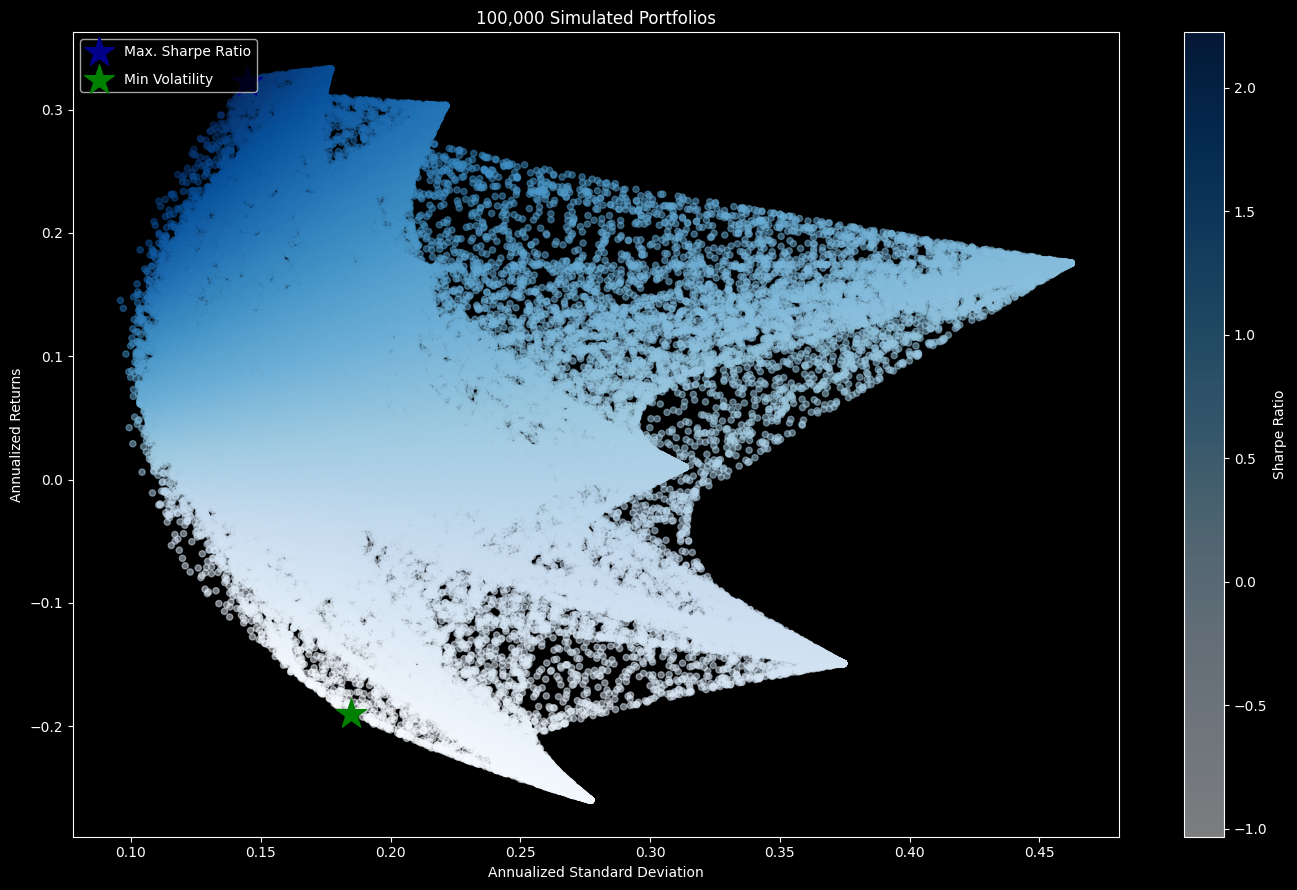

In [65]:
import warnings
warnings.filterwarnings('ignore')
ax = simul_perf.plot.scatter(x=0, y=1, c=2, cmap='Blues',
                             alpha=0.5, figsize=(14, 9), colorbar=True,
                             title=f'{NUM_PF:,d} Simulated Portfolios')

#max_sharpe_idx = simul_perf.iloc[:, 2].idxmax()
max_sharpe_idx = np.where(simul_perf.iloc[:, 2] == simul_perf.iloc[:, 2].max())[0][0]
sd, r = simul_perf.iloc[max_sharpe_idx, :2].values
print(f'Max Sharpe: {sd:.2%}, {r:.2%}')
ax.scatter(sd, r, marker='*', color='darkblue', s=500, label='Max. Sharpe Ratio')

#min_vol_idx = simul_perf.iloc[:, 0].idxmin()
min_vol_idx = np.where(simul_perf.iloc[:, 2] == simul_perf.iloc[:, 2].min())[0][0]
sd, r = simul_perf.iloc[min_vol_idx, :2].values
ax.scatter(sd, r, marker='*', color='green', s=500, label='Min Volatility')
plt.legend(labelspacing=1, loc='upper left')
plt.tight_layout()